In [5]:
using SpecialFunctions
using Distributions
using Optim
using PyPlot


┌ Info: Precompiling SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b]
└ @ Base loading.jl:1317
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1317
┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1317
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1317


In [6]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [7]:
# f(kp, σz, σr) = kp^2 * exp(- kp^2 * σz^2 / 2) * exp(kp^2 * σr^2 / 2) * gamma(0.0, kp^2 * σr^2 / 2)
f(x) = - x[1]^2 * exp(- x[1]^2 * x[2]^2 / 2) * exp(x[1]^2 * x[3]^2 / 2) * gamma(0.0, x[1]^2 * x[3]^2 / 2)

f (generic function with 1 method)

In [8]:
f([1,1,1])

-0.5597735947761608

In [9]:
lower = [0.0, 0.0, 0.0]
upper = [Inf, Inf, Inf]
initial_x = [1.0, 1.0, 1.0]

result = optimize(f, lower, upper, initial_x,)

 * Status: success

 * Candidate solution
    Final objective value:     -2.637368e+16

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 8.66e+09 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    3
    f(x) calls:    1668
    ∇f(x) calls:   1668


In [10]:
Optim.minimizer(result)

3-element Vector{Float64}:
 6.083536938879135e6
 2.2816727503628826e-39
 2.722312378772631e-162

In [11]:
kp = [6.08*10^x for x in 1:7]
σz = [2.28*10.0^(-x) for x in 1:40]
σr = [2.72*10.0^(-x) for x in 1:164];

cols = []
pars = []
for krun in kp, σzrun in σz, σrrun in σr
    x = [krun, σzrun, σrrun]
    push!(pars, x)
    push!(cols, f(x))
end

In [12]:
mask = .!isnan.(cols) .* isfinite.(cols)
pars = hcat(pars...)[:,mask]
cols = cols[mask];

In [13]:
new_ind = sortperm(cols)[1:500]

pars = pars[:, new_ind]
cols = cols[new_ind];

In [14]:
cols_tmp = cols_tmp .- minimum(cols_tmp)

log.(cols_tmp)

LoadError: UndefVarError: cols_tmp not defined

In [15]:
cols_tmp = cols_tmp .- minimum(cols_tmp)
# cols_tmp = log.(cols_tmp .+ 0.1)
cols_tmp = cols_tmp ./ maximum(cols_tmp)

LoadError: UndefVarError: cols_tmp not defined

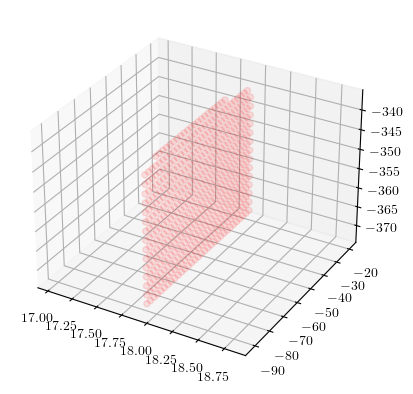

PyObject <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x7f21f8f05ac0>

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(log.(pars[1,:]), log.(pars[2,:]), log.(pars[3,:]), c="r", marker="o", alpha=0.1)


In [17]:
qe = 1.60217662e-19 # Kl
me = 9.10938356e-31 #kg
ne = 7e14 # cm e-3 

7.0e14

In [18]:
ω_p = sqrt(4*pi*7e14*(1.60217662e-19)^2 / 9.10938356e-31 / 0.01^3 ) #cm 

1.5744172793168519e7

In [34]:
fp = 237.0e9 # Hz
wp = 2*pi*fp
kp = wp / 299792458. # 1/m

4967.152702025486

In [30]:
EE_ref(x) = exp(kp^2*(sqrt(2)*x*2e-6)^2/2)*gamma(0.0, kp^2*(sqrt(2)*x*2e-6)^2/2)

EE_ref (generic function with 1 method)

In [31]:
x0 = 1
E0 = EE_ref(x0)

xvals = range(0.5, stop=1.5, length=20)
evals = EE_ref.(xvals)./E0;

In [32]:
evals

20-element Vector{Float64}:
 1.1602374251384049
 1.1370956843795519
 1.1160618537065061
 1.0967840156284483
 1.0789916457963626
 1.0624722993842692
 1.0470560897913117
 1.0326050291535505
 1.0190055104415134
 1.0061628816465011
 0.9939974501094393
 0.9824414872040016
 0.9714369471126042
 0.9609337046683855
 0.9508881766816177
 0.9412622307677987
 0.9320223126034847
 0.9231387411541345
 0.9145851345131836
 0.9063379383408898

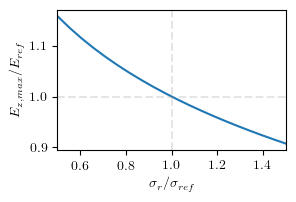

PyObject <matplotlib.lines.Line2D object at 0x7f21f9db54c0>

In [33]:
fig, ax = plt.subplots(1,1, figsize=(2.9528158295281584, 1.8249405451671175),)

ax.plot(xvals, evals)
ax.set_xlabel(L"\sigma_r/\sigma_{ref}")
ax.set_ylabel(L"E_{z, max}/E_{ref}")
ax.set_xlim(0.5, 1.5)
ax.axhline(1, color="gray", alpha=0.2, ls="dashed")
ax.axvline(1, color="gray", alpha=0.2, ls="dashed")

# fig.savefig("../plots/fields.pdf", bbox_inches = "tight")